# Manual Graph of Thoughts Demo: Count Keywords with Simulated Language Model
This example shows how to use the `pure_graph_of_thoughts` package for manual graph of operations construction using the simulated Language Model.

The example task `count_keywords` (defined in `count_keywords.py`) is used.

## Construct Graph of Operations
The graph of operations is constructed.

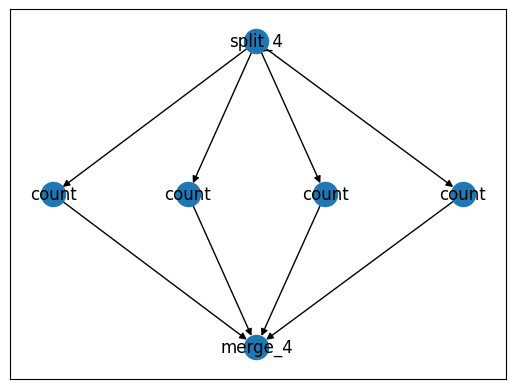

In [1]:
from pure_graph_of_thoughts.api.graph.operation import OperationNode, GraphOfOperations
from pure_graph_of_thoughts.visualization import plot_graph

from auto_graph_of_thoughts.tasks.count_keywords import op_split_4, op_count_demo, op_merge_4


def _create_count_keywords_graph_of_operations() -> GraphOfOperations:

    source = OperationNode.of(op_split_4)
    sink_nodes = []
    for _ in range(4):
        count_node = source.append_operation(op_count_demo)
        sink_nodes.append(count_node)

    merge_node = OperationNode.of(op_merge_4)
    for sink_node in sink_nodes:
        sink_node.append(merge_node)

    return GraphOfOperations.from_source(source)

count_keywords_graph_of_operations: GraphOfOperations = _create_count_keywords_graph_of_operations()
plot_graph(count_keywords_graph_of_operations)

## Execute Graph of Operations
A simulated language model is used as the executing language model.

In [2]:
from auto_graph_of_thoughts.language_model.simulated_chat_gpt_count_keywords import \
    create_simulated_deterministic_chat_gpt_count_keywords
from pure_graph_of_thoughts.controller import CompleteGraphController
import logging

logging.basicConfig(level=logging.INFO)

SEED = 0

ctrl = CompleteGraphController(
    language_model=create_simulated_deterministic_chat_gpt_count_keywords(SEED)
)

INFO:CompleteGraphController:Traversing node 38663c9a-7c1e-4535-81d5-532f386abb8a
INFO:CompleteGraphController:Processing operation PromptOperation(name='split_4', n_inputs=1, n_outputs=4, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 4))
INFO:CompleteGraphController:Traversing node 3cc62131-3dc7-484f-aedb-7245155e1920
INFO:CompleteGraphController:Processing operation PromptOperation(name='count', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node 76571513-1796-4620-bb08-88c0a8d3b106
INFO:CompleteGraphController:Processing operation PromptOperation(name='count', n_inputs=1, n_outputs=1, type=<OperationType.GENERATE: 'generate'>, output_complexity=Fraction(1, 1))
INFO:CompleteGraphController:Traversing node c94df7fb-5200-4926-abe7-40e1b508589e
INFO:CompleteGraphController:Processing operation PromptOperation(name='count', n_inputs=1, n_outputs=1, type=<OperationType

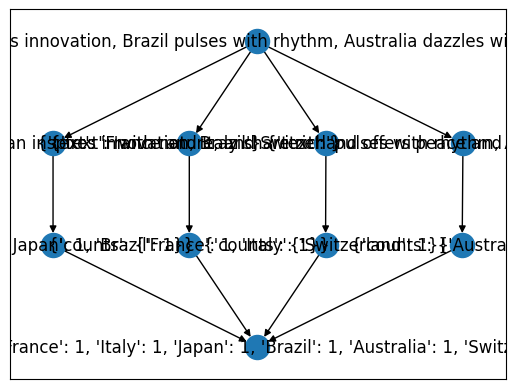

In [3]:
text = 'France and Italy share rich history, Japan inspires innovation, Brazil pulses with rhythm, Australia dazzles with nature, and Switzerland offers peace and precision.'
count_keywords_graph_of_thoughts = ctrl.execute_graph(count_keywords_graph_of_operations, init_state={
    'text': text
})
plot_graph(count_keywords_graph_of_thoughts)

In [4]:
from auto_graph_of_thoughts.tasks.count_keywords import _count_keywords, count_demo_keywords

_count_keywords(count_demo_keywords, text)

Counter({'France': 1,
         'Italy': 1,
         'Japan': 1,
         'Switzerland': 1,
         'Brazil': 1,
         'Australia': 1})